In [313]:
import fiona
import shapely
from rasterio.features import shapes
from shapely.geometry import LineString, shape
from rasterio import Affine as A
from rasterio.warp import transform_bounds

In [314]:
# install dependencies rasterio, shapely, fiona
#brew install spatialindex

In [315]:
dst_crs = 'EPSG:4326'

In [316]:
with fiona.open("walker_3093.geojson", "r") as geojson:
    lines = [LineString(feature["geometry"]["coordinates"]) for feature in geojson]

In [317]:
print(geojson.crs)

None


In [318]:
print(lines[0].bounds)

(116.1915864563114, -1.501041359037667, 116.1937827376827, -1.500012293509809)


In [319]:
#Create Spatial Index

from rtree import index
idx = index.Index()
count = -1
for line in lines:
    count +=1
    idx.insert(count, line.bounds, obj=line)


In [320]:
import rasterio
with rasterio.open('borneo_3093.tif', crs=dst_crs) as src:
    window_bounds=((2000,3500), (3000,4500))
    w = src.read(1, window= window_bounds)
    src_bounds = src.window_bounds(window=window_bounds)


In [321]:
print(w.shape)

(1500, 1500)


In [322]:
print(src.crs)

+init=epsg:32750


In [323]:
print(src_bounds)

(365244.0, 9827412.0, 369744.0, 9831912.0)


In [324]:
dst_bounds=transform_bounds(src.crs,dst_crs,src_bounds[0], src_bounds[1], src_bounds[2], src_bounds[3] )
print(dst_bounds)

(115.78862594171945, -1.5611258003820372, 115.82909464737769, -1.5203992875143304)


In [325]:
print(type(w))

<class 'numpy.ndarray'>


In [326]:
import rasterio.plot as rioplot

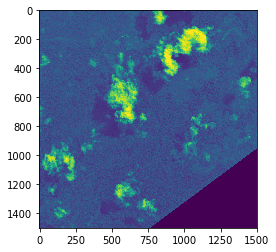

In [327]:
rioplot.show(w, with_bounds=True)

In [348]:
#Find intersecting roads
intersecting_road_items = idx.intersection(dst_bounds,objects=True)
# print(sum(1 for i in intersecting_roads))

In [349]:
roads = list(intersecting_road_items)
lines = [r.object for r in roads]

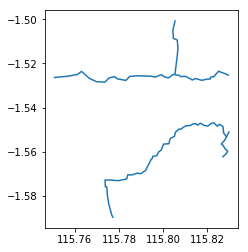

In [356]:
import geopandas as gp
roads  = gp.GeoDataFrame(geometry=lines)
roads.plot()